<a href="https://colab.research.google.com/github/iuri/regressionml/blob/main/FeatureExtractionOpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import os
from google.colab import drive

import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt



In [6]:
# to mount Google Drive
drive.mount('/content/gdrive')
print(os.listdir("/content/gdrive/MyDrive/BKP/MESTRADO/dataset/temp"))

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
['001.png', '045.png', '002.png', '031.png', '003.png', '069.png', '090.png', '027.png', '129.png', '106.png', '160.png', '146.png', '191.png', '175.png', '2141.png', '2154.png', '222.png', '2150.png', '2151.png', '2153.png', '210.png', '219.png', '220.png', '201.png', '221.png', '2140.png', '2148.png', '2149.png', '2142.png', '2152.png', '3295.png', '3290.png', '3291.png', '3297.png', '3293.png', '3298.png', '3289.png', '3762.png', '401.png', '3759.png', '3760.png', '3761.png', '3757.png', '399.png', '578.png', '601.png', '606.png', '520.png', '603.png', '577.png', '604.png', '599.png', '524.png', '605.png', '523.png', '522.png', '521.png', '402.png']


In [12]:
# como a maoria dos algoritmos sao aplciados numa unica imagem e utilizam escala de cinza, este bloco esta separado
img = cv.imread('/content/gdrive/MyDrive/BKP/MESTRADO/dataset/temp/001.png')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

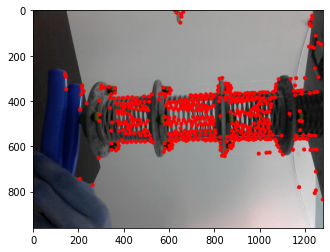

(<matplotlib.image.AxesImage at 0x7f7020b687c0>, None)

In [13]:
# corners 
corners = cv.goodFeaturesToTrack(gray,500,0.01,10)
corners = np.int0(corners)
# print(corners)
for i in corners:
    x,y = i.ravel()
    cv.circle(img,(x,y),9,255,-1)
plt.imshow(img),plt.show()

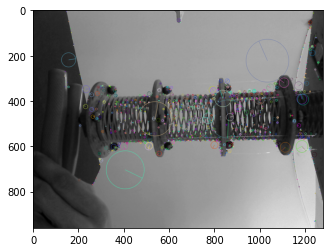

(<matplotlib.image.AxesImage at 0x7f7020971070>, None)

In [20]:
# SIFT algorithm
# pontos de curvas muito pequenos. Melhorar. modificar o padrao da funcao SIFT_create()
# flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
sift = cv.SIFT_create()
kp = sift.detect(gray,None)
img=cv.drawKeypoints(gray,kp,img, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# cv.imwrite('sift_keypoints.jpg',img)
plt.imshow(img),plt.show()


In [22]:
# Now to calculate the descriptor, OpenCV provides two methods.
#
# Since you already found keypoints, you can call sift.compute() which computes the descriptors from the keypoints we have found. Eg: kp,des = sift.compute(gray,kp)
# If you didn't find keypoints, directly find keypoints and descriptors in a single step with the function, sift.detectAndCompute().
# We will see the second method:

# sift = cv.SIFT_create()
# kp, des = sift.detectAndCompute(gray,None)
# Here kp will be a list of keypoints and des is a numpy array of shape (Number of Keypoints)×128.

# So we got keypoints, descriptors etc. Now we want to see how to match keypoints in different images. That we will learn in coming chapters.
kp, des = sift.detectAndCompute(gray,None)

In [24]:
# surf
# Create SURF object. You can specify params here or later.
# Here I set Hessian Threshold to 400
surf = cv.xfeatures2d.SURF_create(400)
# Find keypoints and descriptors directly
kp, des = surf.detectAndCompute(img,None)
len(kp)


error: ignored

Threshold: 10
nonmaxSuppression:True
neighborhood: 2
Total Keypoints with nonmaxSuppression: 7868
Total Keypoints without nonmaxSuppression: 34036


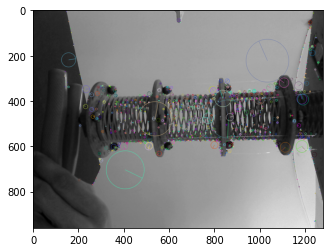

(<matplotlib.image.AxesImage at 0x7f70209117f0>, None)

In [26]:
###
### FAST
###
# Initiate FAST object with default values
fast = cv.FastFeatureDetector_create()
# find and draw the keypoints
kp = fast.detect(img,None)
img2 = cv.drawKeypoints(img, kp, None, color=(255,0,0))
# Print all default params
print( "Threshold: {}".format(fast.getThreshold()) )
print( "nonmaxSuppression:{}".format(fast.getNonmaxSuppression()) )
print( "neighborhood: {}".format(fast.getType()) )
print( "Total Keypoints with nonmaxSuppression: {}".format(len(kp)) )
cv.imwrite('fast_true.png', img2)
# Disable nonmaxSuppression
fast.setNonmaxSuppression(0)
kp = fast.detect(img, None)
print( "Total Keypoints without nonmaxSuppression: {}".format(len(kp)) )
img3 = cv.drawKeypoints(img, kp, None, color=(255,0,0))
# cv.imwrite('fast_false.png', img3)
plt.imshow(img),plt.show()